In [1]:
# Import required libraries and dependencies
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import hvplot.pandas
import warnings

In [2]:
# Load the data into a Pandas DataFrame
f_path = Path('Resources/crypto_market_data.csv')
df_market_data = pd.read_csv(
    f_path, index_col="coin_id")

# Display sample data
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


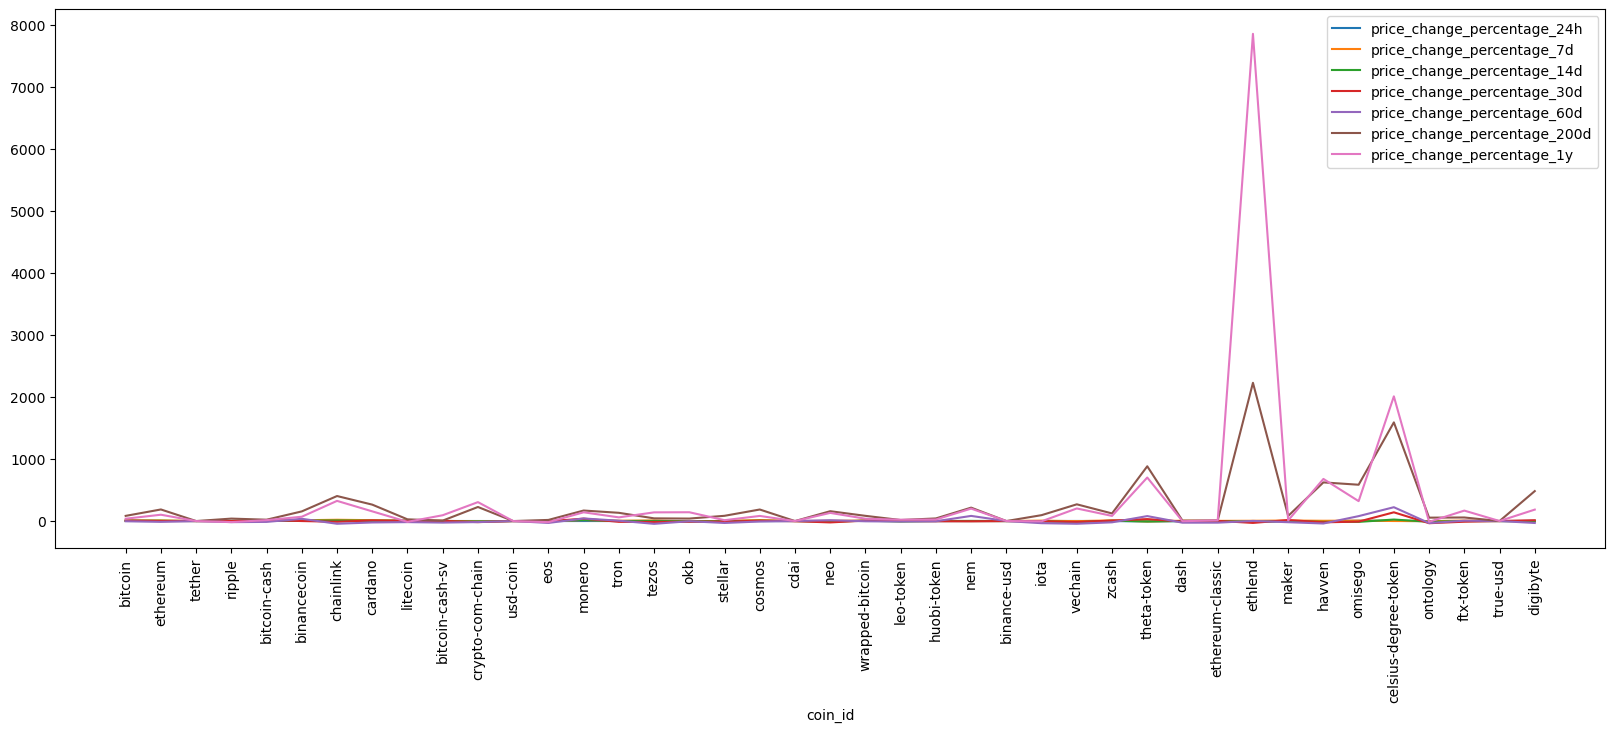

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.plot(
figsize=(20,7)
)
x_ticks = plt.xticks(range(len(df_market_data.index)),df_market_data.index, rotation= 90)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns = df_market_data.columns)

# Copy the crypto names from the original data

# Set the coinid column as index
new_scaled_df= scaled_df.set_index(df_market_data.index)

# Display sample data
new_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
ks = list(range(1,12))

In [8]:
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in ks:
  k_model=KMeans(n_clusters=i)
  k_model.fit(new_scaled_df)
  inertia.append(k_model.inertia_)
warnings.simplefilter('ignore')

C:\Users\tadip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tadip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tadip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tadip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [9]:
# Create a dictionary with the data to plot the Elbow curve

elbow = {'ks':ks,
         'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow)

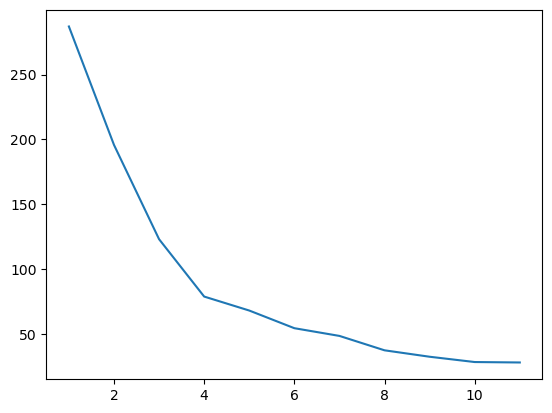

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['ks'],elbow_df['inertia'])
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
k_model= KMeans(n_clusters=4)

In [12]:
# Fit the K-Means model using the scaled data
k_model.fit(new_scaled_df)
warnings.simplefilter('ignore')

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
y_pred = k_model.predict(new_scaled_df)

# Print the resulting array of cluster values.
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 3, 2, 0, 2, 1, 0, 2, 2, 2])

In [14]:
# Create a copy of the DataFrame
copied_df = new_scaled_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
copied_df['cluster'] = y_pred

# Display sample data
copied_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
copied_df.hvplot.scatter(x = "price_change_percentage_24h", y = "price_change_percentage_7d", by = 'cluster', 
                        hover_cols= "coin_id")

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pca_data = pca.fit_transform(new_scaled_df)
# View the first five rows of the DataFrame.
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
array = pca.explained_variance_ratio_
total = array[0]+array[1]+array[2]
print(f'Each component represents {array} of the data, respectively, for a total of: {round(total,3)}%')

Each component represents [0.3719856  0.34700813 0.17603793] of the data, respectively, for a total of: 0.895%


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** In total, our 3 components explain almost 90% of the entire dataset we possess. The first component, by himself, describes 37% of our dataset. As for the second and the third, they each describe 35% and 17% of the dataset, respectively.

In [20]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns = ['PCA1', 'PCA2','PCA3'])

# Copy the crypto names from the original data

# Set the coinid column as index
new_pca_df = pca_df.set_index(new_scaled_df.index)
# Display sample data
new_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_list = list(range(1,12))

In [22]:
# Create an empty list to store the inertia values

inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_list:
  k_model =KMeans(n_clusters=i)
  k_model.fit(new_pca_df)
  inertia.append(k_model.inertia_)
warnings.simplefilter("ignore")

In [23]:
# Create a dictionary with the data to plot the Elbow curve

elbow2 = {'k_list':k_list,
         'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow2)

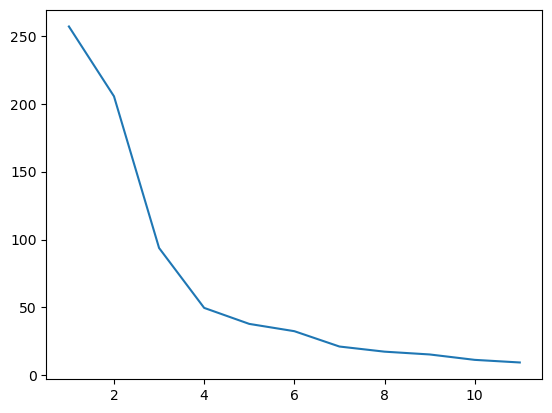

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df2['k_list'],elbow_df2['inertia'])
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4)

In [26]:
# Fit the K-Means model using the PCA data
k_model.fit(new_pca_df)
warnings.simplefilter("ignore")

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
y_pred2 = k_model.predict(new_pca_df)
# Print the resulting array of cluster values.
y_pred2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 3, 2, 2, 2, 2])

In [28]:
# Create a copy of the DataFrame with the PCA data
copied_df2 = new_pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
copied_df2['PCA_cluster'] = y_pred2

# Display sample data
copied_df2.head()

,PCA1,PCA2,PCA3,PCA_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
copied_df2.hvplot.scatter(x = "PCA1", y = "PCA2", by = 'PCA_cluster', hover_cols= "coin_id")

:NdOverlay   [PCA_cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

In [30]:
#This partChecking which features were chosen
import numpy as np
loadings = pca.components_
absolute_loadings = np.abs(loadings)
most_important_features = np.argmax(absolute_loadings, axis = 1)
for component, feature_idx in enumerate(most_important_features):
  feature_name = copied_df.columns[feature_idx]
  print(f'Componet {component+1}: Most important feature is {feature_name}')

  #That's why our data is so different from the one we did previously

Componet 1: Most important feature is price_change_percentage_200d
Componet 2: Most important feature is price_change_percentage_30d
Componet 3: Most important feature is price_change_percentage_7d


In [31]:
copied_df.hvplot.scatter(x = "price_change_percentage_200d", y = "price_change_percentage_30d", by = 'cluster', 
                        hover_cols= "coin_id")

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_200d]   (price_change_percentage_30d,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [43]:
# Composite plot to contrast the Elbow curves
elbow_original_data = elbow_df.hvplot.line(x = "ks", y="inertia", title = 'Original Data Elbow Graph')
elbow_PCA_data = elbow_df2.hvplot.line(x = "k_list", y="inertia", title = "PCA Data Elbow Graph")
plots = (elbow_original_data + elbow_PCA_data).cols(1)
plots

:Layout
   .Curve.I  :Curve   [ks]   (inertia)
   .Curve.II :Curve   [k_list]   (inertia)

In [48]:
# Composite plot to contrast the clusters
cluster_original_data = copied_df.hvplot.scatter(x = "price_change_percentage_24h", y = "price_change_percentage_7d",
                                                 title = 'Original Data Elbow Graph', by = "cluster")
cluster_PCA_data = copied_df2.hvplot.scatter(x = "PCA1", y="PCA2",
                                             title = "PCA Data Cluster Graph", by ="PCA_cluster")
plots2 = (cluster_original_data + cluster_PCA_data).cols(1)
plots2

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [PCA_cluster]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**